# はじめに

時系列データのbarycenterを求める手法(DBA, soft-DTW)をpython, PyTorchで実装する．





In [2]:
import numpy as np
import pylab as plt
import pandas as pd
from glob import glob

In [3]:
from mpl_toolkits.basemap import Basemap

In [4]:
trace = []
for file in sorted(glob("./data/*2017*")):
    data = pd.read_csv(file, encoding="shift_jis")
    for ind in data["台風番号"].unique():
        temp = data[data["台風番号"] == ind]
        if sum(temp["上陸"]==1) > 0:
            trace.append(temp[["経度", "緯度", "年"]].values)

In [5]:
from tslearn.barycenters import dtw_barycenter_averaging, softdtw_barycenter

In [9]:
from tslearn.metrics import dtw_path

In [15]:
path, loss = dtw_path(trace[0], trace[1])

In [16]:
path[0]

(0, 0)

In [ ]:
m = Basemap(llcrnrlon=100.,llcrnrlat=10.,urcrnrlon=170.,urcrnrlat=60.,
            rsphere=(6378137.00,6356752.3142),
            resolution='h',projection='merc')
m.fillcontinents()

for tr in trace[[0,1]]:
    x,y = m(tr[:, 0], tr[:, 1])
    plt.plot(x,y,  marker="", lw=1, ls="-", c="gray")


    
x,y = m(barycenter[:, 0], barycenter[:, 1])
plt.plot(x,y,  marker="", lw=1, ls="-")

plt.show()

In [16]:
barycenter = softdtw_barycenter(trace, gamma=10)

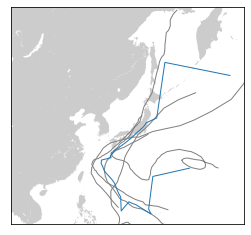

In [17]:
m = Basemap(llcrnrlon=100.,llcrnrlat=10.,urcrnrlon=170.,urcrnrlat=60.,
            rsphere=(6378137.00,6356752.3142),
            resolution='h',projection='merc')
m.fillcontinents()

for tr in trace:
    x,y = m(tr[:, 0], tr[:, 1])
    plt.plot(x,y,  marker="", lw=1, ls="-", c="gray")
x,y = m(barycenter[:, 0], barycenter[:, 1])
plt.plot(x,y,  marker="", lw=1, ls="-")

plt.show()

In [ ]:
barycenter = dtw_barycenter_averaging(trace)